# 哈希表

<u>哈希表（hash table）</u>，又称<u>散列表</u>，它通过建立键 `key` 与值 `value` 之间的映射，实现高效的元素查询。具体而言，我们向哈希表中输入一个键 `key` ，则可以在 $O(1)$ 时间内获取对应的值 `value` 。

如下图所示，给定 $n$ 个学生，每个学生都有“姓名”和“学号”两项数据。假如我们希望实现“输入一个学号，返回对应的姓名”的查询功能，则可以采用下图所示的哈希表来实现。

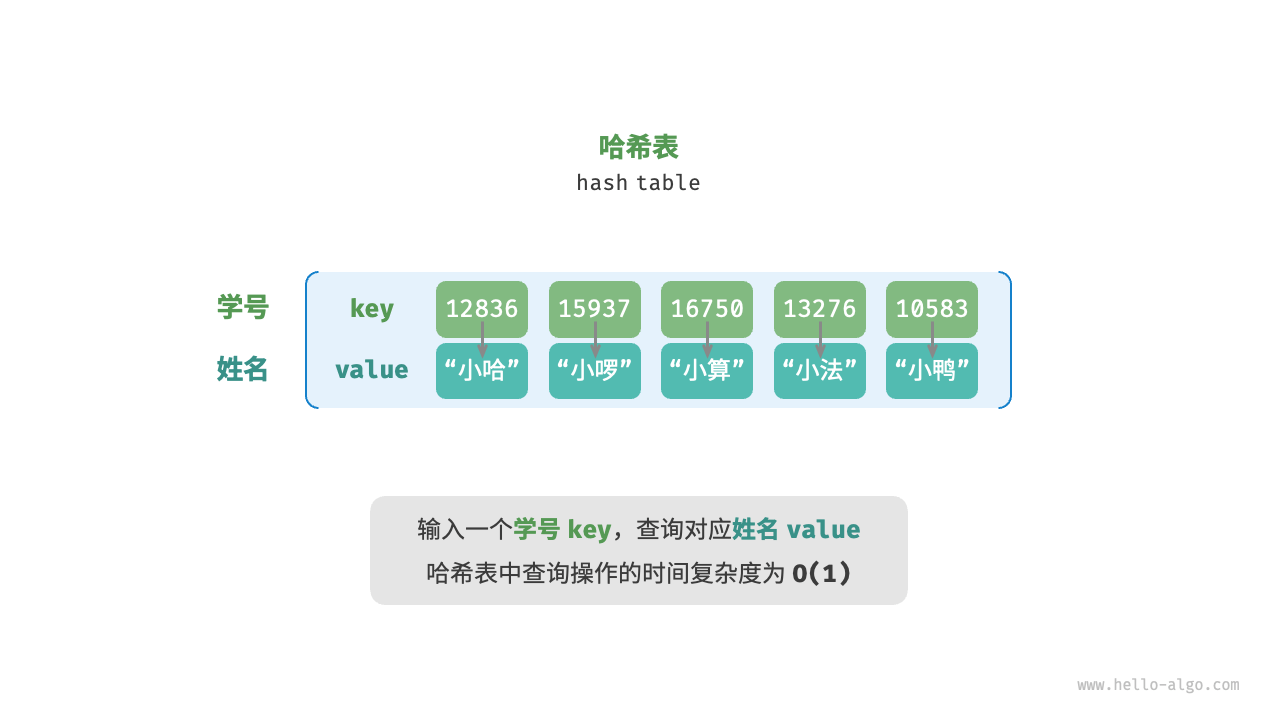

除哈希表外，数组和链表也可以实现查询功能，它们的效率对比如下表所示。

- **添加元素**：仅需将元素添加至数组（链表）的尾部即可，使用 $O(1)$ 时间。
- **查询元素**：由于数组（链表）是乱序的，因此需要遍历其中的所有元素，使用 $O(n)$ 时间。
- **删除元素**：需要先查询到元素，再从数组（链表）中删除，使用 $O(n)$ 时间。

<p align="center"> 表 <id> &nbsp; 元素查询效率对比 </p>

|          | 数组   | 链表   | 哈希表 |
| -------- | ------ | ------ | ------ |
| 查找元素 | $O(n)$ | $O(n)$ | $O(1)$ |
| 添加元素 | $O(1)$ | $O(1)$ | $O(1)$ |
| 删除元素 | $O(n)$ | $O(n)$ | $O(1)$ |

观察发现，**在哈希表中进行增删查改的时间复杂度都是 $O(1)$** ，非常高效。

## 哈希表常用操作

哈希表的常见操作包括：初始化、查询操作、添加键值对和删除键值对等，示例代码如下：


In [1]:
package main

import (
	"fmt"
)

func main() {
// 初始化哈希表
hmap := make(map[int]string)

// 添加操作
// 在哈希表中添加键值对
hmap[12836] = "小哈"
hmap[15937] = "小啰"
hmap[16750] = "小算"
hmap[13276] = "小法"
hmap[10583] = "小鸭"

// 查询操作
// 向哈希表中输入键key，得到对应的值value
name := hmap[13276]
fmt.Println("学号为13276的同学姓名是：", name)

// 删除操作
// 从哈希表中删除键key对应的键值对
delete(hmap, 10583)

// 遍历操作
// 遍历键值对
for id, name := range hmap {
	fmt.Println("学号：", id, "，姓名：", name)
}

// 单独遍历键 key
for id := range hmap {
	fmt.Println("学号：", id)
}

// 单独遍历值 value
for _, name := range hmap {
	fmt.Println("姓名：", name)
}

}

学号为13276的同学姓名是： 小法
学号： 12836 ，姓名： 小哈
学号： 15937 ，姓名： 小啰
学号： 16750 ，姓名： 小算
学号： 13276 ，姓名： 小法
学号： 15937
学号： 16750
学号： 13276
学号： 12836
姓名： 小哈
姓名： 小啰
姓名： 小算
姓名： 小法


## 哈希表简单实现

我们先考虑最简单的情况，**仅用一个数组来实现哈希表**。在哈希表中，我们将数组中的每个空位称为<u>桶（bucket）</u>，每个桶可存储一个键值对。因此，查询操作就是找到 `key` 对应的桶，并在桶中获取 `value` 。

那么，如何基于 `key` 定位对应的桶呢？这是通过<u>哈希函数（hash function）</u>实现的。哈希函数的作用是将一个较大的输入空间映射到一个较小的输出空间。在哈希表中，输入空间是所有 `key` ，输出空间是所有桶（数组索引）。换句话说，输入一个 `key` ，**我们可以通过哈希函数得到该 `key` 对应的键值对在数组中的存储位置**。

输入一个 `key` ，哈希函数的计算过程分为以下两步。

1. 通过某种哈希算法 `hash()` 计算得到哈希值。
2. 将哈希值对桶数量（数组长度）`capacity` 取模，从而获取该 `key` 对应的桶（数组索引）`index` 。

```shell
index = hash(key) % capacity
```

随后，我们就可以利用 `index` 在哈希表中访问对应的桶，从而获取 `value` 。

设数组长度 `capacity = 100`、哈希算法 `hash(key) = key` ，易得哈希函数为 `key % 100` 。下图以 `key` 学号和 `value` 姓名为例，展示了哈希函数的工作原理。

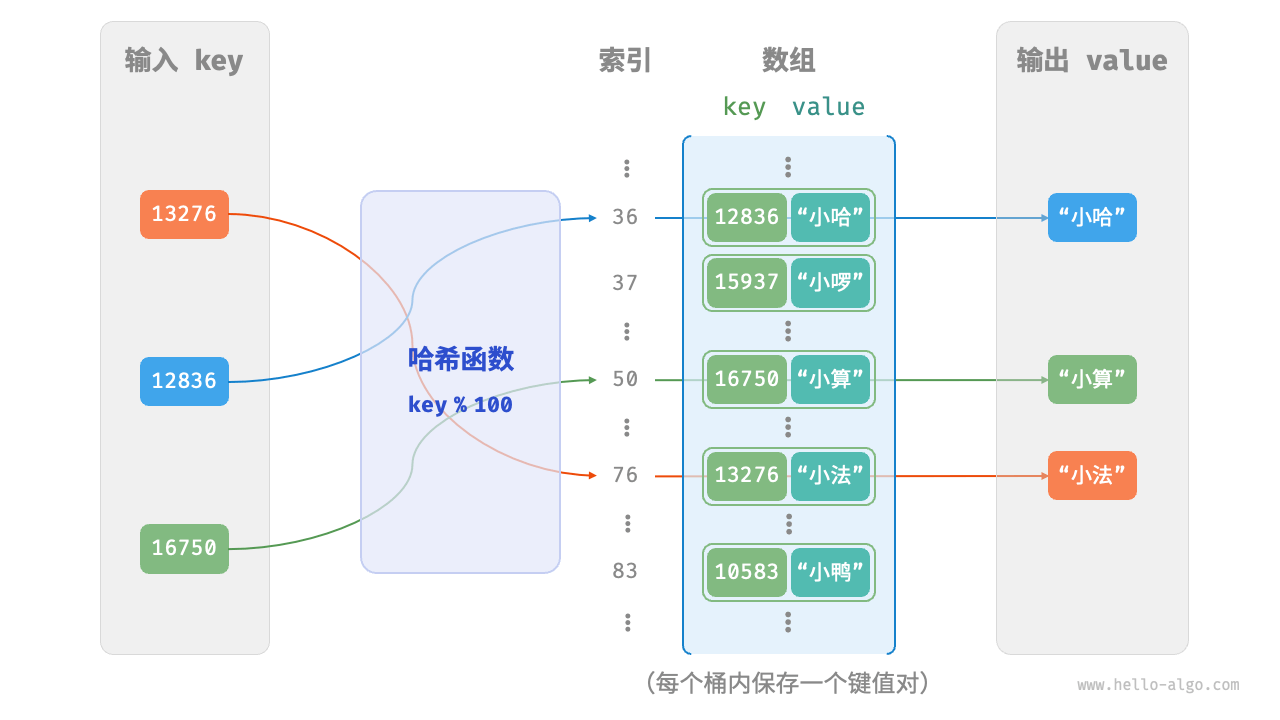

以下代码实现了一个简单哈希表。其中，我们将 `key` 和 `value` 封装成一个类 `Pair` ，以表示键值对。


In [3]:
// 键值对
type Pair struct {
	key   int
	value string
}

// 基于数组实现的哈希表
type arrayHashMap struct {
	buckets []*Pair
}

// 初始化哈希表
func newArrayHashMap(capacity int) *arrayHashMap {
	// 初始化数组 包含一百个桶
	buckets := make([]*Pair, 100)
	return &arrayHashMap{buckets: buckets}
}

// 哈希函数
func (a *arrayHashMap) hashfunc(key int) int {
	index := key % 100
	return index
}

// 查询操作
func (a *arrayHashMap) get(key int) string {
	index := a.hashfunc(key)
	pair := a.buckets[index]
	if pair != nil && pair.key == key {
		return pair.value
	}
	return ""
}

// 添加操作
func (a *arrayHashMap) put(key int, value string) {
	index := a.hashfunc(key)
	a.buckets[index] = &Pair{key: key, value: value}
}

// 删除操作
func (a *arrayHashMap) delete(key int) {
	index := a.hashfunc(key)
	pair := a.buckets[index]
	if pair != nil && pair.key == key {
		a.buckets[index] = nil
	}
}

// 获取所有键对
func (a *arrayHashMap) pairset() []*pair{
	var pairs []*Pair
	for _, pair := range a.buckets {
		if pair != nil {
			pairs = append(pairs, pair)
		}
	}
	return pairs
}

// 获取所有键
func (a *arrayHashMap) keyset() []int {
	var keys []int
	for _,pair := range a.buckets{
		if pair != nil {
			keys = append(keys, pair.key)
		}
	}
	return keys
}

// 获取所有值
func (a *arrayHashMap) valueset() []string{
	var values []string
	for _,pair := range a.buckets{
		if pair != nil {
			values = append(values, pair.value)
		}
	}
	return values
}

// 打印哈希表
func (a *arrayHashMap) printHashMap() {
	for _, pair := range a.buckets {
		if pair != nil {
			fmt.Println("学号：", pair.key, "，姓名：", pair.value)
		}
	}
}



# gonb_0871c996 

 

 ./main.go:53:37: undefined: pair
 
}

// 获取所有键对
 func (a *arrayHashMap) pairset() []*pair{
 var pairs []*Pair
	for _, pair := range a.buckets {

ERROR: failed to run "/usr/bin/go build -o /tmp/gonb_0871c996/gonb_0871c996": exit status 1

## 6.1.3 哈希冲突与扩容
从本质上看，哈希函数的作用是将所有 `key` 构成的输入空间映射到数组所有索引构成的输出空间，而输入空间往往远大于输出空间。因此，理论上一定存在“多个输入对应相同输出”的情况。

对于上述示例中的哈希函数，当输入的 `key` 后两位相同时，哈希函数的输出结果也相同。例如，查询学号为 12836 和 20336 的两个学生时，我们得到：
```shell
12836 % 100 = 36
20336 % 100 = 36
```
如图 6-3 所示，两个学号指向了同一个姓名，这显然是不对的。我们将这种多个输入对应同一输出的情况称为哈希冲突（hash collision）。
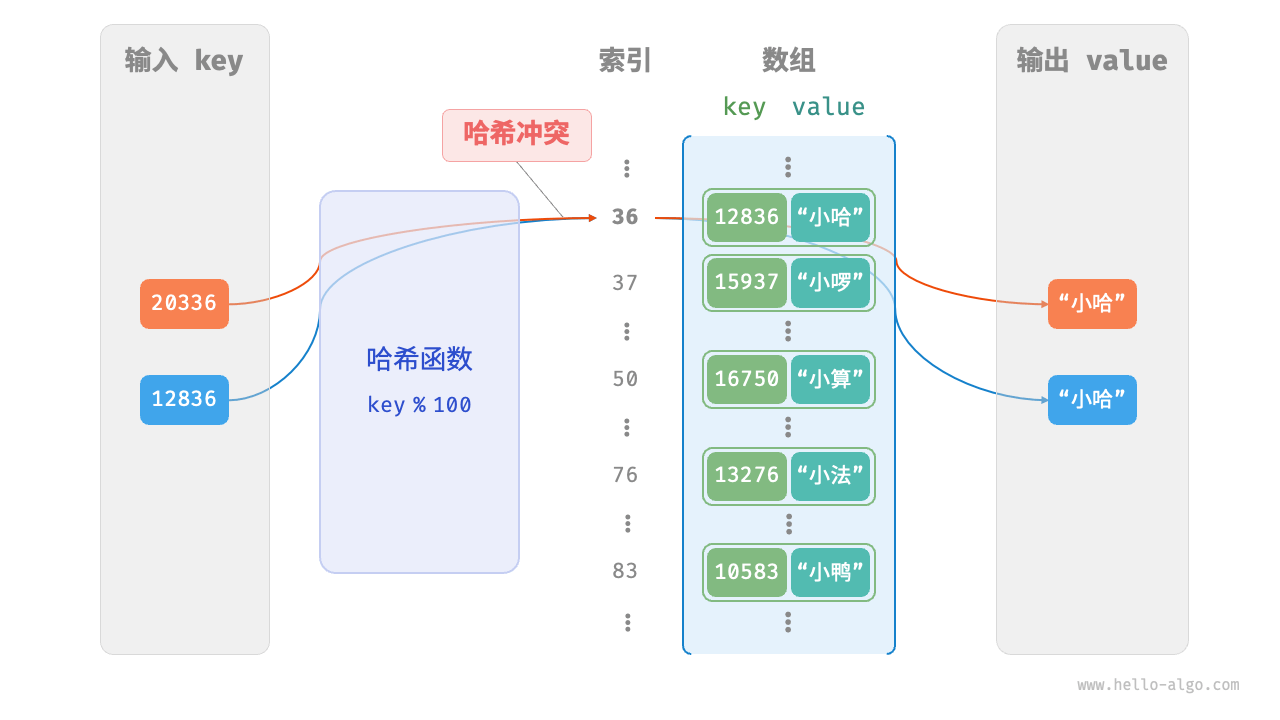
容易想到，哈希表容量 $n$ 越大，多个 `key` 被分配到同一个桶中的概率就越低，冲突就越少。因此，**我们可以通过扩容哈希表来减少哈希冲突**。

如下图所示，扩容前键值对 `(136, A)` 和 `(236, D)` 发生冲突，扩容后冲突消失。
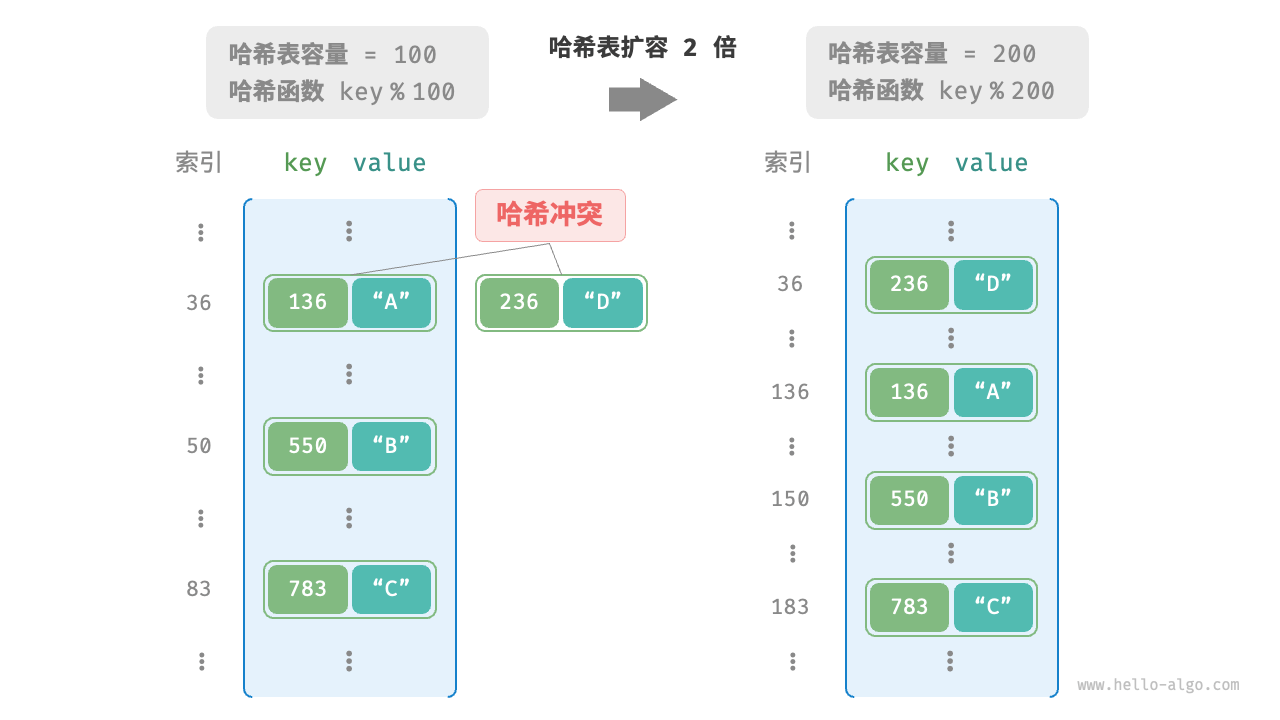
类似于数组扩容，哈希表扩容需将所有键值对从原哈希表迁移至新哈希表，非常耗时；并且由于哈希表容量 `capacity` 改变，我们需要通过哈希函数来重新计算所有键值对的存储位置，这进一步增加了扩容过程的计算开销。为此，编程语言通常会预留足够大的哈希表容量，防止频繁扩容。

<u>负载因子（load factor）</u>是哈希表的一个重要概念，其定义为哈希表的元素数量除以桶数量，用于衡量哈希冲突的严重程度，**也常作为哈希表扩容的触发条件**。例如在 Java 中，当负载因子超过 $0.75$ 时，系统会将哈希表扩容至原先的 $2$ 倍。

# 6.2哈希冲突
上一节提到，**通常情况下哈希函数的输入空间远大于输出空间**，因此理论上哈希冲突是不可避免的。比如，输入空间为全体整数，输出空间为数组容量大小，则必然有多个整数映射至同一桶索引。

哈希冲突会导致查询结果错误，严重影响哈希表的可用性。为了解决该问题，每当遇到哈希冲突时，我们就进行哈希表扩容，直至冲突消失为止。此方法简单粗暴且有效，但效率太低，因为哈希表扩容需要进行大量的数据搬运与哈希值计算。为了提升效率，我们可以采用以下策略。

1. 改良哈希表数据结构，**使得哈希表可以在出现哈希冲突时正常工作**。
2. 仅在必要时，即当哈希冲突比较严重时，才执行扩容操作。

哈希表的结构改良方法主要包括“**链式地址**”和“**开放寻址**”。

## 链式地址

在原始哈希表中，每个桶仅能存储一个键值对。<u>链式地址（separate chaining）</u>将单个元素转换为链表，将键值对作为链表节点，将所有发生冲突的键值对都存储在同一链表中。下图展示了一个链式地址哈希表的例子。

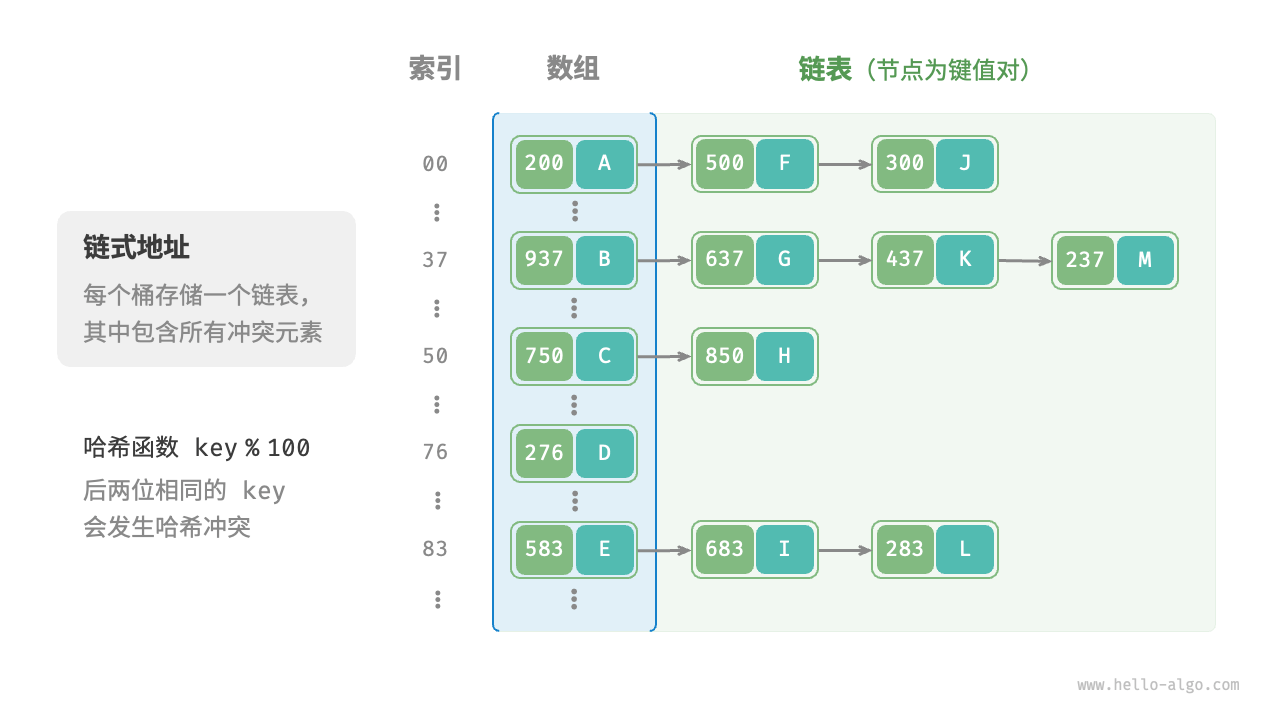

基于链式地址实现的哈希表的操作方法发生了以下变化。

- **查询元素**：输入 `key` ，经过哈希函数得到桶索引，即可访问链表头节点，然后遍历链表并对比 `key` 以查找目标键值对。
- **添加元素**：首先通过哈希函数访问链表头节点，然后将节点（键值对）添加到链表中。
- **删除元素**：根据哈希函数的结果访问链表头部，接着遍历链表以查找目标节点并将其删除。

链式地址存在以下局限性。

- **占用空间增大**：链表包含节点指针，它相比数组更加耗费内存空间。
- **查询效率降低**：因为需要线性遍历链表来查找对应元素。

以下代码给出了链式地址哈希表的简单实现，需要注意两点。

- 使用列表（动态数组）代替链表，从而简化代码。在这种设定下，哈希表（数组）包含多个桶，每个桶都是一个列表。
- 以下实现包含哈希表扩容方法。当负载因子超过 $\frac{2}{3}$ 时，我们将哈希表扩容至原先的 $2$ 倍。


In [ ]:
/* 链式地址哈希表 */
type hashMapChaining struct {
    size        int      // 键值对数量
    capacity    int      // 哈希表容量
    loadThres   float64  // 触发扩容的负载因子阈值
    extendRatio int      // 扩容倍数
    buckets     [][]pair // 桶数组
}

/* 构造方法 */
func newHashMapChaining() *hashMapChaining {
    buckets := make([][]pair, 4)
    for i := 0; i < 4; i++ {
        buckets[i] = make([]pair, 0)
    }
    return &hashMapChaining{
        size:        0,
        capacity:    4,
        loadThres:   2.0 / 3.0,
        extendRatio: 2,
        buckets:     buckets,
    }
}

/* 哈希函数 */
func (m *hashMapChaining) hashFunc(key int) int {
    return key % m.capacity
}

/* 负载因子 */
func (m *hashMapChaining) loadFactor() float64 {
    return float64(m.size) / float64(m.capacity)
}

/* 查询操作 */
func (m *hashMapChaining) get(key int) string {
    idx := m.hashFunc(key)
    bucket := m.buckets[idx]
    // 遍历桶，若找到 key ，则返回对应 val
    for _, p := range bucket {
        if p.key == key {
            return p.val
        }
    }
    // 若未找到 key ，则返回空字符串
    return ""
}

/* 添加操作 */
func (m *hashMapChaining) put(key int, val string) {
    // 当负载因子超过阈值时，执行扩容
    if m.loadFactor() > m.loadThres {
        m.extend()
    }
    idx := m.hashFunc(key)
    // 遍历桶，若遇到指定 key ，则更新对应 val 并返回
    for i := range m.buckets[idx] {
        if m.buckets[idx][i].key == key {
            m.buckets[idx][i].val = val
            return
        }
    }
    // 若无该 key ，则将键值对添加至尾部
    p := pair{
        key: key,
        val: val,
    }
    m.buckets[idx] = append(m.buckets[idx], p)
    m.size += 1
}

/* 删除操作 */
func (m *hashMapChaining) remove(key int) {
    idx := m.hashFunc(key)
    // 遍历桶，从中删除键值对
    for i, p := range m.buckets[idx] {
        if p.key == key {
            // 切片删除
            m.buckets[idx] = append(m.buckets[idx][:i], m.buckets[idx][i+1:]...)
            m.size -= 1
            break
        }
    }
}

/* 扩容哈希表 */
func (m *hashMapChaining) extend() {
    // 暂存原哈希表
    tmpBuckets := make([][]pair, len(m.buckets))
    for i := 0; i < len(m.buckets); i++ {
        tmpBuckets[i] = make([]pair, len(m.buckets[i]))
        copy(tmpBuckets[i], m.buckets[i])
    }
    // 初始化扩容后的新哈希表
    m.capacity *= m.extendRatio
    m.buckets = make([][]pair, m.capacity)
    for i := 0; i < m.capacity; i++ {
        m.buckets[i] = make([]pair, 0)
    }
    m.size = 0
    // 将键值对从原哈希表搬运至新哈希表
    for _, bucket := range tmpBuckets {
        for _, p := range bucket {
            m.put(p.key, p.val)
        }
    }
}

/* 打印哈希表 */
func (m *hashMapChaining) print() {
    var builder strings.Builder

    for _, bucket := range m.buckets {
        builder.WriteString("[")
        for _, p := range bucket {
            builder.WriteString(strconv.Itoa(p.key) + " -> " + p.val + " ")
        }
        builder.WriteString("]")
        fmt.Println(builder.String())
        builder.Reset()
    }
}